# Load libraries 

In [1]:
# load libraries
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
import statsmodels.api as sm
import researchpy as rp
from statsFuncs.mean_confidence_interval import *
from plotFuncs import prettypyplot
import scipy
from scipy import stats as stats
from scipy import stats as cp
import os
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib import rcParams
import seaborn as sns
import glob as glob
from natsort import natsorted
sns.set(color_codes=True)

# stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scikit_posthocs as sp

# magic functions
%load_ext autoreload
%autoreload 2
%matplotlib inline

# create dummy class for struct-like dataframes


class structtype():
    pass

# Paths 

In [2]:
figurespath = os.getcwd()
analysispath = '/Users/teresa/Dropbox/Psicologia/PhD/UC BERKELEY/WHITNEY LAB/PERIFOVMOONEY_GENDER_ECC/analysis/'

# Figure parameters 

In [3]:
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [6, 4]
   }
rcParams.update(params)
# rcParams.keys()

In [4]:
linestyle_conditions = {'high holistic': '-', 'low holistic': '--'}

# Load data 

In [5]:
# find all data available
allsubjects = pd.read_csv(analysispath + 'allsubjects_perifovmooney_ecc_post.csv', index_col=0) 

In [6]:
allsubjects.head()

,SUBID,TRIAL,MOONEYID,MOONEYCATEGORY,LOC,COND,MOONEY_NAME,MOONEY_GENDER,ECCENTRICITY,RESPONSE,ACCURACY,RT,SUBINIT,ECC_PLOT,ECC_PLOT_ABS
0,17,1,4,high holistic,left,upright,U0061.bmp,female,12,male,0,0.000423,AG,-6.0,6.0
1,17,2,17,low holistic,right,upright,U0346.bmp,female,4,male,0,5.510411,AG,2.0,2.0
2,17,3,6,low holistic,left,inverted,U0106.bmp,male,12,male,1,0.000166,AG,-6.0,6.0
3,17,4,8,low holistic,right,upright,U0137.bmp,male,2,male,1,0.000100,AG,1.0,1.0
4,17,5,18,low holistic,left,inverted,U0359.bmp,male,6,male,1,6.347243,AG,-3.0,3.0


# Organize df 

In [7]:
numLocs = 13
numCategories = 2
numConditions = 3

accPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()
locations = np.unique(allsubjects['ECC_PLOT'])
subjects = np.unique(allsubjects['SUBINIT'])
conditions = ['upright', 'inverted', 'holistic']
row = 0

for sub in subjects:
    subdata = allsubjects[allsubjects['SUBINIT'] == sub]
    subid = np.unique(subdata['SUBID'])
    for locs in locations:
        for category in range(numCategories):

            if category == 0:
                index_category = 'high holistic'
            elif category == 1:
                index_category = 'low holistic'
            
            for condition in conditions:
                if condition == 'upright':
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'LOC'] = indexed_upright.LOC.unique()                  
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_upright
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_upright
                
                elif condition == 'inverted':
                    
                    indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'inverted')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                        
                    m_inverted, lower_inverted, upper_inverted = mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'LOC'] = indexed_inverted.LOC.unique()                  

                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_inverted
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_inverted
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_inverted
                
                elif condition == 'holistic':
                        # index the datapoints from each locations
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                    indexed_inverted = subdata[(
                        subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                        & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])
                    m_inverted, lower_inverted, upper_inverted = mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])
                    
                    accPerLocs.loc[row, 'SUBINIT'] = sub 
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'LOC'] = indexed_upright.LOC.unique()                  
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                row = row + 1

# Holistic data

In [8]:
holistic = accPerLocs[accPerLocs['CONDITION'] == 'holistic']
holistic_plot = accPerLocs[accPerLocs['CONDITION'] == 'holistic'].groupby(['SUBINIT']).mean()['MEAN']

In [9]:
categories = ['high holistic', 'low holistic']

In [10]:
upright_inverted = accPerLocs[accPerLocs['CONDITION'] != 'holistic']

#  Interaction df 

## ECC 

In [11]:
# per subject
row=0
row_2=0
row_all=0
ecc_holistic_interaction = pd.DataFrame()
ecc_holistic_interaction_all = pd.DataFrame()

    
for ecc in holistic.ECC_PLOT.unique():
    
    ecc_holistic_interaction_tmp = pd.DataFrame()
    for subject in holistic.SUBINIT.unique():

    
        tmp = holistic[(holistic['ECC_PLOT'] == ecc) & (holistic['SUBINIT'] == subject)]
        high_holistic = tmp[tmp['MOONEYCATEGORY'] == 'high holistic']['MEAN'].reset_index(drop=True)[0]
        
        low_holistic = tmp[tmp['MOONEYCATEGORY'] == 'low holistic']['MEAN'].reset_index(drop=True)[0]

        
        diff = high_holistic - low_holistic
        
        ecc_holistic_interaction_tmp.loc[row, 'SUBINIT'] = subject
        ecc_holistic_interaction_tmp.loc[row, 'ECC'] = ecc
        ecc_holistic_interaction_tmp.loc[row, 'DIFF'] = diff
        
        ecc_holistic_interaction_all.loc[row_all, 'SUBINIT'] = subject
        ecc_holistic_interaction_all.loc[row_all, 'ECC'] = ecc
        ecc_holistic_interaction_all.loc[row_all, 'DIFF'] = diff
        
        row += 1
        row_all += 1
        
    mean, upper, lower = mean_confidence_interval(ecc_holistic_interaction_tmp['DIFF'])
    
    ecc_holistic_interaction.loc[row_2, 'ECC'] = ecc
    ecc_holistic_interaction.loc[row_2, 'MEAN_DIFF'] = mean
    ecc_holistic_interaction.loc[row_2, 'CI_UPPER'] = upper
    ecc_holistic_interaction.loc[row_2, 'CI_LOWER'] = lower
    
    row_2 += 1
        
    
        
        
    
    
    

## ABS ECC 

In [12]:
# per subject
row=0
row_2=0
row_all=0
ecc_abs_holistic_interaction = pd.DataFrame()
ecc_abs_holistic_interaction_all = pd.DataFrame()
    
for ecc_abs in holistic.ECC_PLOT_ABS.unique():
    
    ecc_abs_holistic_interaction_tmp = pd.DataFrame()
    for subject in holistic.SUBINIT.unique():

    
        tmp = holistic[(holistic['ECC_PLOT_ABS'] == ecc_abs) & (holistic['SUBINIT'] == subject)]
        high_holistic = tmp[tmp['MOONEYCATEGORY'] == 'high holistic']['MEAN'].reset_index(drop=True)[0]
        
        low_holistic = tmp[tmp['MOONEYCATEGORY'] == 'low holistic']['MEAN'].reset_index(drop=True)[0]

        
        diff = high_holistic - low_holistic
        
        ecc_abs_holistic_interaction_tmp.loc[row, 'SUBINIT'] = subject
        ecc_abs_holistic_interaction_tmp.loc[row, 'ECC_PLOT_ABS'] = ecc_abs
        ecc_abs_holistic_interaction_tmp.loc[row, 'DIFF'] = diff
        
        ecc_abs_holistic_interaction_all.loc[row_all, 'SUBINIT'] = subject
        ecc_abs_holistic_interaction_all.loc[row_all, 'ECC_PLOT_ABS'] = ecc_abs
        ecc_abs_holistic_interaction_all.loc[row_all, 'DIFF'] = diff
        
        row += 1
        row_all += 1
        
    mean, upper, lower = mean_confidence_interval(ecc_abs_holistic_interaction_tmp['DIFF'])
    
    ecc_abs_holistic_interaction.loc[row_2, 'ECC_PLOT_ABS'] = ecc_abs
    ecc_abs_holistic_interaction.loc[row_2, 'MEAN_DIFF'] = mean
    ecc_abs_holistic_interaction.loc[row_2, 'CI_UPPER'] = upper
    ecc_abs_holistic_interaction.loc[row_2, 'CI_LOWER'] = lower
    
    row_2 += 1
        
    
        
        
    
    
    

## LOC 

In [13]:
# per subject
row=0
row_2=0
loc_holistic_interaction = pd.DataFrame()
loc_holistic_interaction_all = pd.DataFrame()
row_all=0


    
for loc in holistic.LOC.unique():
    
    loc_holistic_interaction_tmp = pd.DataFrame()
    row=0
    for subject in holistic.SUBINIT.unique():

    
        tmp = holistic[(holistic['LOC'] == loc) & (holistic['SUBINIT'] == subject)]
        high_holistic = tmp[tmp['MOONEYCATEGORY'] == 'high holistic']['MEAN'].reset_index(drop=True)[0]
        
        low_holistic = tmp[tmp['MOONEYCATEGORY'] == 'low holistic']['MEAN'].reset_index(drop=True)[0]

        
        diff = high_holistic - low_holistic
        
        loc_holistic_interaction_tmp.loc[row, 'SUBINIT'] = subject
        loc_holistic_interaction_tmp.loc[row, 'loc'] = loc
        loc_holistic_interaction_tmp.loc[row, 'DIFF'] = diff
        
        loc_holistic_interaction_all.loc[row_all, 'SUBINIT'] = subject
        loc_holistic_interaction_all.loc[row_all, 'LOC'] = loc
        loc_holistic_interaction_all.loc[row_all, 'DIFF'] = diff
        
        row += 1
        row_all += 1
        
    mean, upper, lower = mean_confidence_interval(loc_holistic_interaction_tmp['DIFF'])
    
    loc_holistic_interaction.loc[row_2, 'loc'] = loc
    loc_holistic_interaction.loc[row_2, 'MEAN_DIFF'] = mean
    loc_holistic_interaction.loc[row_2, 'CI_UPPER'] = upper
    loc_holistic_interaction.loc[row_2, 'CI_LOWER'] = lower
    
    row_2 += 1
        
    
        
        
    
    
    

# Main effect 

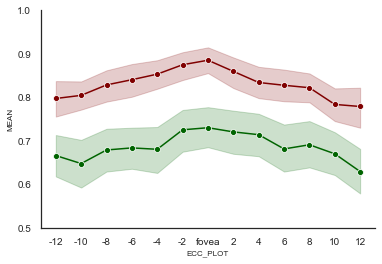

In [17]:
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'], marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('Main_effect_upin.svg', format='svg', dpi=1200)

plt.show()

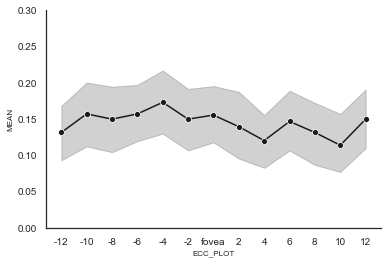

In [18]:
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', data=holistic,
            color='k', marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
plt.ylim(0, 0.3)

plt.savefig('Main_effect_holistic.svg', format='svg', dpi=1200)

plt.show()

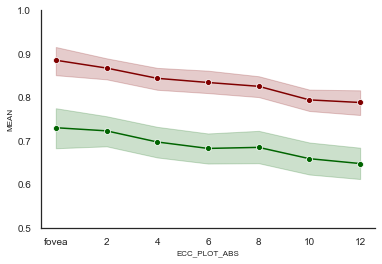

In [19]:
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'], marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0.5, 1)
ax.get_legend().remove()
plt.savefig('Main_effect_abs_upin_ecc.svg', format='svg', dpi=1200)

plt.show()

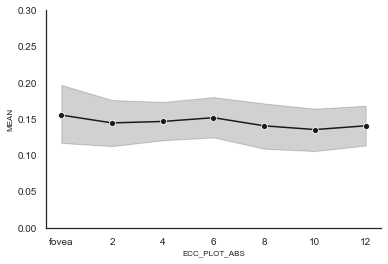

In [20]:
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', data=holistic, color='k', marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.30)
# ax.get_legend().remove()
plt.savefig('Main_effect_abs_holistic_ecc.svg', format='svg', dpi=1200)

plt.show()

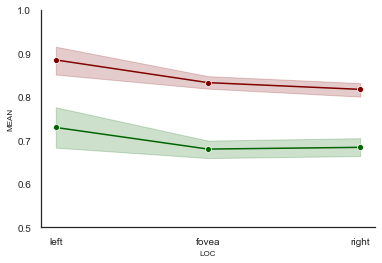

In [21]:
xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'], marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('Main_effect_LeftvsRight_upin.svg', format='svg', dpi=1200)

plt.show()

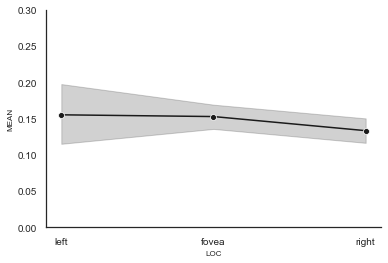

In [22]:
xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC', y='MEAN', data=holistic,
            color='k', marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
plt.ylim(0, 0.3)

plt.savefig('Main_effect_LeftvsRight_holistic.svg', format='svg', dpi=1200)

plt.show()

# Figure 1 

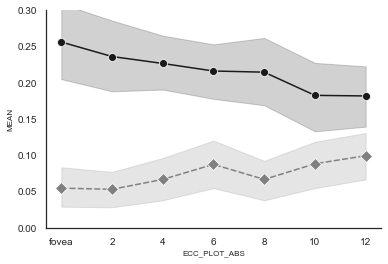

In [23]:
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', data=holistic, hue='MOONEYCATEGORY', style='MOONEYCATEGORY', 
                  palette=['k', 'grey'], markers=['o', 'D'], ms=8, ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.30)
ax.get_legend().remove()
plt.savefig('Abs_ecc.svg', format='svg', dpi=1200)

plt.show()

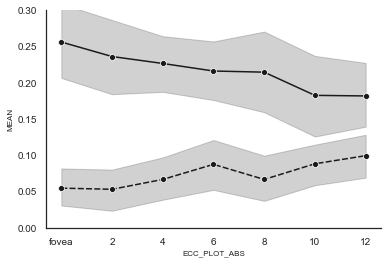

In [24]:
holistic_abs_grouped = holistic.groupby(['SUBINIT', 'ECC_PLOT_ABS', 'MOONEYCATEGORY'], as_index=False).mean()
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', data=holistic_abs_grouped, style='MOONEYCATEGORY', color='k', marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.30)
ax.get_legend().remove()
# plt.savefig('Abs_ecc.svg', format='svg', dpi=1200)

plt.show()

eccentricity: 0.0 - Difference: 0.20160000000000008
eccentricity: 1.0 - Difference: 0.18320000000000003
eccentricity: 2.0 - Difference: 0.16000000000000003
eccentricity: 3.0 - Difference: 0.12880000000000003
eccentricity: 4.0 - Difference: 0.14799999999999996
eccentricity: 5.0 - Difference: 0.09440000000000007
eccentricity: 6.0 - Difference: 0.08240000000000006


(0, 0.3)

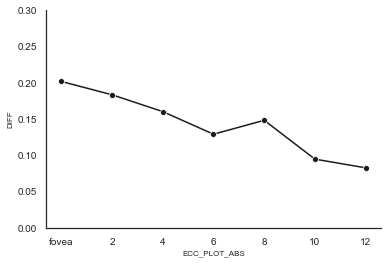

In [25]:
holistic_abs_grouped = holistic.groupby(['ECC_PLOT_ABS', 'MOONEYCATEGORY'], as_index=False).mean()
diff = pd.DataFrame()
row = 0
for ecc in holistic_abs_grouped.ECC_PLOT_ABS.unique():
    
    high = holistic_abs_grouped[(holistic_abs_grouped['ECC_PLOT_ABS'] == ecc) & (holistic_abs_grouped['MOONEYCATEGORY'] == 'high holistic')]['MEAN'].reset_index(drop=True)[0]
    low = holistic_abs_grouped[(holistic_abs_grouped['ECC_PLOT_ABS'] == ecc) & (holistic_abs_grouped['MOONEYCATEGORY'] == 'low holistic')]['MEAN'].reset_index(drop=True)[0]
    
    difference = high - low
    
    diff.loc[row, 'ECC_PLOT_ABS'] = ecc
    diff.loc[row, 'DIFF'] = difference
    
    row += 1

    print('eccentricity: ' + str(ecc) + ' - Difference: ' + str(difference))
    
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='DIFF', data=diff, color='k', marker='o')
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.3)
    

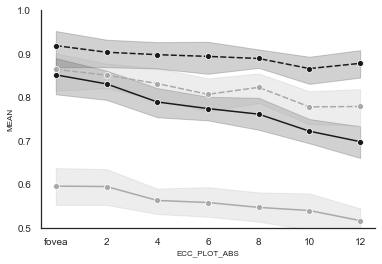

In [26]:
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['k', 'darkgray'], style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0.5, 1)
ax.get_legend().remove()
plt.savefig('Abs_ecc_upin.svg', format='svg', dpi=1200)

plt.show()

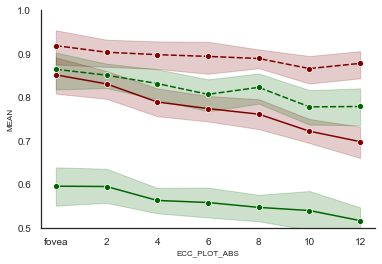

In [29]:
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'], style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0.5, 1)
ax.get_legend().remove()
plt.savefig('Abs_ecc_upin_colors.svg', format='svg', dpi=1200)

plt.show()

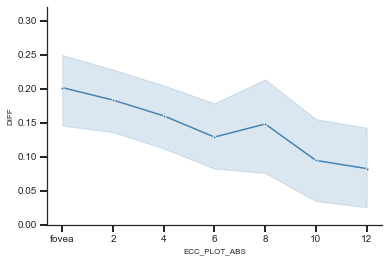

In [76]:
holistic_abs_grouped = holistic.groupby(['SUBINIT', 'ECC_PLOT_ABS', 'MOONEYCATEGORY'], as_index=False).mean()
diff = pd.DataFrame()
row = 0
for subject in holistic_abs_grouped.SUBINIT.unique():
    for ecc in holistic_abs_grouped.ECC_PLOT_ABS.unique():

        high = holistic_abs_grouped[
            (holistic_abs_grouped['ECC_PLOT_ABS'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'high holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]
        low = holistic_abs_grouped[
            (holistic_abs_grouped['ECC_PLOT_ABS'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'low holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]

        difference = high - low
        
        diff.loc[row, 'SUBINIT'] = subject
        diff.loc[row, 'ECC_PLOT_ABS'] = ecc
        diff.loc[row, 'DIFF'] = difference

        row += 1

    
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='DIFF', data=diff, color='steelblue', marker='.')
prettypyplot.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.32)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)

plt.savefig('Abs_ecc_diff.svg', format='svg', dpi=1200)


    

# Figure 2 

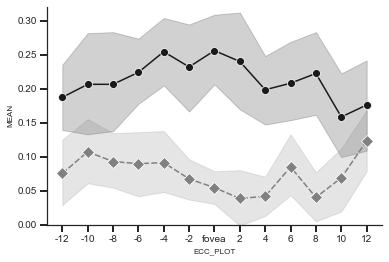

In [75]:
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', data=holistic, hue='MOONEYCATEGORY',
            palette=['k', 'grey'],style='MOONEYCATEGORY', markers=['o', 'D'], ms=8, ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
plt.ylim(0, 0.32)
ax.get_legend().remove()
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)

plt.savefig('Nonabs_ecc.svg', format='svg', dpi=1200)

plt.show()

In [49]:
allecc_data = pd.DataFrame()
ct = 0
for mooney_category in holistic.MOONEYCATEGORY.unique():
    
    for eccentricity in holistic.ECC_PLOT.unique():
        
        condition_df = holistic[(holistic['MOONEYCATEGORY'] == mooney_category) & (holistic['ECC_PLOT'] == eccentricity)]
        
        mean, low, high = mean_confidence_interval(condition_df['MEAN'])

        allecc_data.loc[ct, 'ECC_PLOT'] = eccentricity                
        allecc_data.loc[ct, 'MOONEYCATEGORY'] = mooney_category        
        allecc_data.loc[ct, 'MEAN'] = mean
        allecc_data.loc[ct, 'LOW'] = low
        allecc_data.loc[ct, 'HIGH'] = high
        
        ct += 1

In [50]:
allecc_data

,ECC_PLOT,MOONEYCATEGORY,MEAN,LOW,HIGH
0,-6.0,high holistic,0.1872,0.134399,0.240001
1,-5.0,high holistic,0.2064,0.130634,0.282166
2,-4.0,high holistic,0.2064,0.127549,0.285251
3,-3.0,high holistic,0.2240,0.172444,0.275556
4,-2.0,high holistic,0.2544,0.200500,0.308300
5,-1.0,high holistic,0.2320,0.160504,0.303496
6,0.0,high holistic,0.2560,0.200620,0.311380
7,1.0,high holistic,0.2400,0.165547,0.314453
8,2.0,high holistic,0.1984,0.143955,0.252845
9,3.0,high holistic,0.2080,0.144230,0.271770


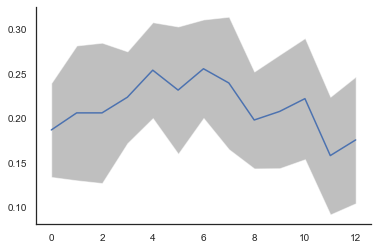

In [56]:
allecc_high_holistic = allecc_data[allecc_data['MOONEYCATEGORY'] == 'high holistic']
fig, ax = plt.subplots()
ax.plot(range(len(allecc_high_holistic)), allecc_high_holistic['MEAN'])
ax.fill_between(range(len(allecc_high_holistic)), allecc_high_holistic['LOW'], allecc_high_holistic['HIGH'],facecolor='gray', alpha=0.5)
plt.show()

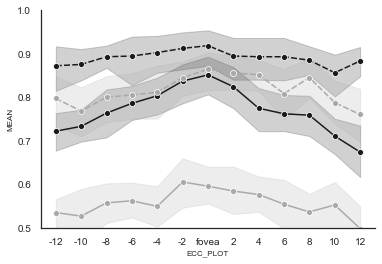

In [32]:
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['k', 'darkgray'],style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('Nonabs_ecc_upin.svg', format='svg', dpi=1200)

plt.show()

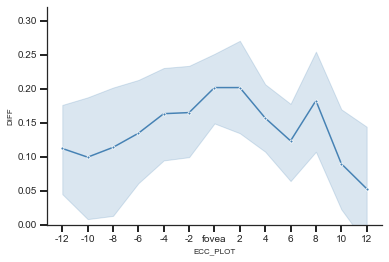

In [77]:
holistic_abs_grouped = holistic.groupby(['SUBINIT', 'ECC_PLOT', 'MOONEYCATEGORY'], as_index=False).mean()
diff = pd.DataFrame()
row = 0
for subject in holistic_abs_grouped.SUBINIT.unique():
    for ecc in holistic_abs_grouped.ECC_PLOT.unique():

        high = holistic_abs_grouped[
            (holistic_abs_grouped['ECC_PLOT'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'high holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]
        low = holistic_abs_grouped[
            (holistic_abs_grouped['ECC_PLOT'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'low holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]

        difference = high - low
        
        diff.loc[row, 'SUBINIT'] = subject
        diff.loc[row, 'ECC_PLOT'] = ecc
        diff.loc[row, 'DIFF'] = difference

        row += 1

    
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='DIFF', data=diff, color='steelblue', marker='.')
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
plt.ylim(0, 0.32)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)

plt.savefig('Nonabs_cc_diff.svg', format='svg', dpi=1200)


    

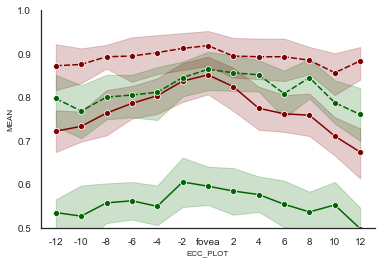

In [34]:
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'],style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('Nonabs_ecc_upin_colors.svg', format='svg', dpi=1200)

plt.show()

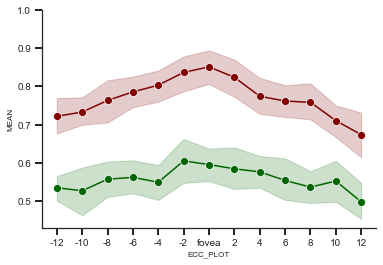

In [71]:
high_holistic_upin = upright_inverted[upright_inverted['MOONEYCATEGORY'] == 'high holistic']
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=high_holistic_upin,
            palette=['maroon', 'darkgreen'],style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ms=8, ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.43, 1)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)

plt.savefig('Nonabs_ecc_upin_colors_high.svg', format='svg', dpi=1200)

plt.show()

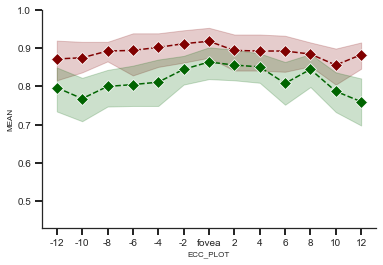

In [72]:
low_holistic_upin = upright_inverted[upright_inverted['MOONEYCATEGORY'] == 'low holistic']
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=low_holistic_upin,
            palette=['maroon', 'darkgreen'], marker='D', ms=8, ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
ax.get_legend().remove()
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")

plt.ylim(0.43, 1)
ax.tick_params(axis='both',which='major',direction='out',bottom=True, left=True, width=2, length=7)

plt.savefig('Nonabs_ecc_upin_colors_low.svg', format='svg', dpi=1200)

plt.show()

# Figure 3 

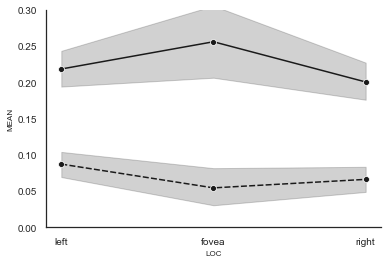

In [37]:
# xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC', y='MEAN', data=holistic,
            color='k',style='MOONEYCATEGORY', marker='o', ci=95, sort=False)
prettypyplot.beautiPlot(sns)
# plt.xticks(range(3), xlabels_abs)
plt.ylim(0, 0.3)
ax.get_legend().remove()

plt.savefig('LeftvsRight.svg', format='svg', dpi=1200)

plt.show()

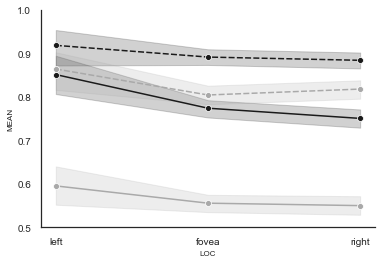

In [38]:
xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['k', 'darkgray'],style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('LeftvsRight_upin.svg', format='svg', dpi=1200)

plt.show()

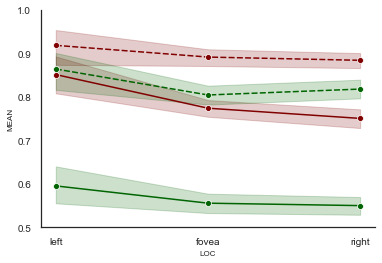

In [39]:
xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC', y='MEAN', hue='CONDITION', data=upright_inverted,
            palette=['maroon', 'darkgreen'],style='MOONEYCATEGORY', markers=False, dashes=True, marker='o', ci=95)
prettypyplot.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
ax.get_legend().remove()
plt.ylim(0.5, 1)

plt.savefig('LeftvsRight_upin_colors.svg', format='svg', dpi=1200)

plt.show()

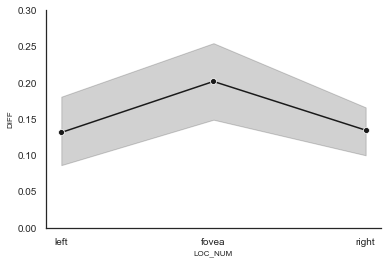

In [40]:
holistic_abs_grouped = holistic.groupby(['SUBINIT', 'LOC', 'MOONEYCATEGORY'], as_index=False).mean()
diff = pd.DataFrame()
row = 0
for subject in holistic_abs_grouped.SUBINIT.unique():
    for ecc in holistic_abs_grouped.LOC.unique():

        high = holistic_abs_grouped[
            (holistic_abs_grouped['LOC'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'high holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]
        low = holistic_abs_grouped[
            (holistic_abs_grouped['LOC'] == ecc) &
            (holistic_abs_grouped['MOONEYCATEGORY'] == 'low holistic') &
        (holistic_abs_grouped['SUBINIT'] == subject)]['MEAN'].reset_index(drop=True)[0]

        difference = high - low
        
        diff.loc[row, 'SUBINIT'] = subject
        diff.loc[row, 'LOC'] = ecc
        diff.loc[row, 'DIFF'] = difference

        row += 1

    
xlabels_abs = ['left', 'fovea', 'right']
diff.loc[diff['LOC'] == 'left', 'LOC_NUM'] = '0'
diff.loc[diff['LOC'] == 'fovea', 'LOC_NUM'] = '1'
diff.loc[diff['LOC'] == 'right', 'LOC_NUM'] = '2'

ax = sns.lineplot(x='LOC_NUM', y='DIFF', data=diff, color='k', marker='o', sort=True)
prettypyplot.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
plt.ylim(0, 0.3)
plt.savefig('LeftvsRight_diff.svg', format='svg', dpi=1200)


    

In [41]:
len(allsubjects[(allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECCENTRICITY'] == 12) & (allsubjects['MOONEYCATEGORY'] == 'high holistic') & (allsubjects['COND'] == 'upright')])

50

In [42]:
allsubjects[(allsubjects['SUBINIT'] == 'AG') & (allsubjects['ECCENTRICITY'] == '12') & (allsubjects['MOONEYCATEGORY'] == 'high holistic')]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,SUBID,TRIAL,MOONEYID,MOONEYCATEGORY,LOC,COND,MOONEY_NAME,MOONEY_GENDER,ECCENTRICITY,RESPONSE,ACCURACY,RT,SUBINIT,ECC_PLOT,ECC_PLOT_ABS
